# Cat and Dog Image Classifier


## Steps for project


1. Imports and Setup

2. Data Preparation

3. Data Augmentation

4. Model Definition

5. Training

6. Evaluation

7. Testing

8. Submission


## 1. Imports and Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Constants
BATCH_SIZE = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150
EPOCHS = 15

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 2. Data Preparation



In [ ]:
from google.colab import files
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. First verify the file upload
uploaded = files.upload()  # This will prompt you to select the file
print("Uploaded files:", list(uploaded.keys()))

# 2. Verify it's a valid zip file
zip_filename = list(uploaded.keys())[0]  # Get the uploaded filename
print(f"File size: {len(uploaded[zip_filename])} bytes")

try:
    # 3. Save and verify the zip file
    with open(zip_filename, 'wb') as f:
        f.write(uploaded[zip_filename])

    # 4. Try opening the zip file
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # Verify the zip contents
        print("Zip contents:", zip_ref.namelist()[:5])  # First 5 files
        # Extract only if verification passes
        zip_ref.extractall('/content')
except zipfile.BadZipFile:
    print("ERROR: The file is not a valid zip file or is corrupted")
    print("Please re-upload a fresh copy of cats_and_dogs.zip")
    raise
except Exception as e:
    print(f"Error: {str(e)}")
    raise

# 5. Only proceed if extraction was successful
PATH = '/content/cats_and_dogs_filtered'
if not os.path.exists(PATH):
    raise FileNotFoundError(f"Extracted folder not found at {PATH}")

print("\nDirectory structure after extraction:")
print(os.listdir(PATH))
print("\nTrain directory contents:")
print(os.listdir(os.path.join(PATH, 'train')))
print("\nValidation directory contents:")
print(os.listdir(os.path.join(PATH, 'validation')))

# Now create your generators (only if extraction succeeded)
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=os.path.join(PATH, 'train'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=os.path.join(PATH, 'validation'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# For test data (if available)
test_dir = os.path.join(PATH, 'test')
if os.path.exists(test_dir):
    test_image_generator = ImageDataGenerator(rescale=1./255)
    test_data_gen = test_image_generator.flow_from_directory(
        directory=PATH,
        classes=['test'],
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode=None,
        shuffle=False,
        batch_size=BATCH_SIZE
    )
else:
    print("Note: Test directory not found")

Saving cats_and_dogs_filtered.zip to cats_and_dogs_filtered.zip
Uploaded files: ['cats_and_dogs_filtered.zip']
File size: 68606236 bytes
Zip contents: ['cats_and_dogs_filtered/', 'cats_and_dogs_filtered/vectorize.py', 'cats_and_dogs_filtered/validation/', 'cats_and_dogs_filtered/train/', 'cats_and_dogs_filtered/validation/dogs/']

Directory structure after extraction:
['vectorize.py', 'train', 'validation']

Train directory contents:
['cats', 'dogs']

Validation directory contents:
['cats', 'dogs']
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Note: Test directory not found


## 3. Data Augmentation

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## 4. Model Definition


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Training

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.5127 - loss: 0.7075 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1:16 1s/step - accuracy: 0.5938 - loss: 0.6903

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.5938 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4939 - loss: 0.6932 - val_accuracy: 0.5766 - val_loss: 0.6735
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.5312 - loss: 0.6940 - val_accuracy: 0.5907 - val_loss: 0.6736
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6065 - loss: 0.6720 - val_accuracy: 0.6411 - val_loss: 0.6681
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.6562 - loss: 0.6869 - val_accuracy: 0.6421 - val_loss: 0.6608
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6370 - loss: 0.6404 - val_accuracy: 0.6623 - val_loss: 0.6276
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.5625 - loss: 0.7071 - val_accuracy: 0.6472 - val_loss: 0.6276
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6855 - loss: 0.5907 - val_accuracy: 0.6764 - val_

## 6. Evaluation


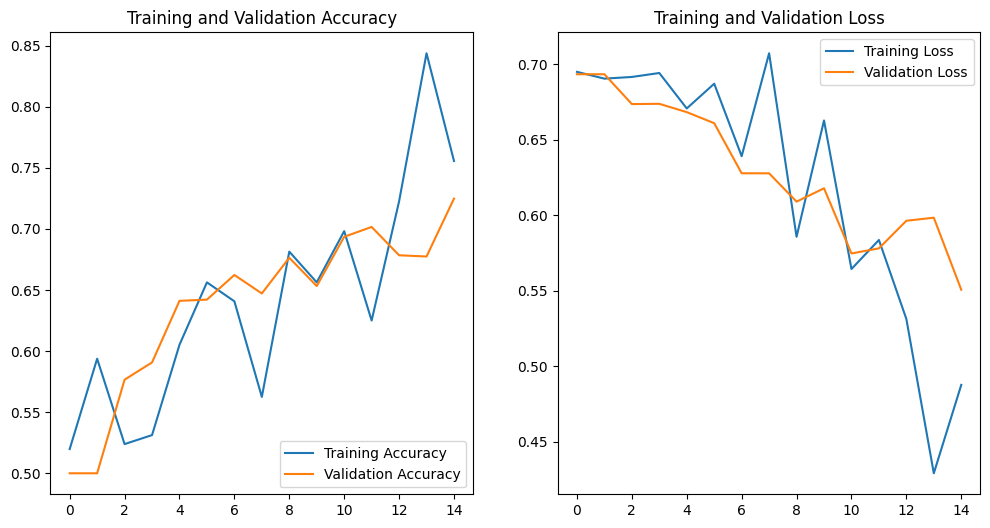

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 7. Testing


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step


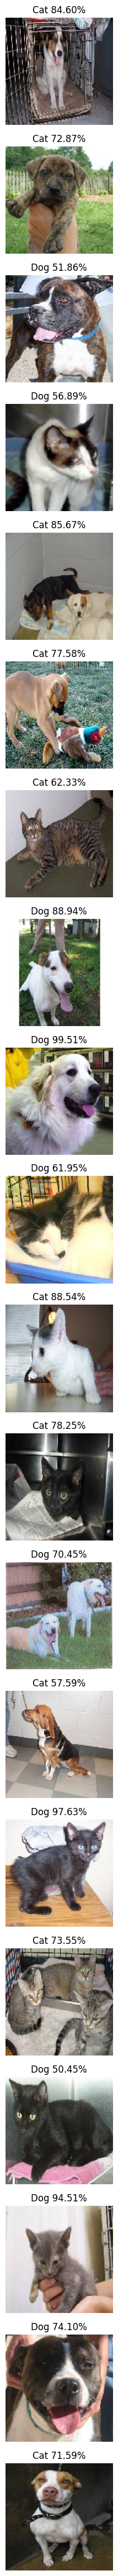


Validation Accuracy: 50.70%


In [ ]:
# Get predictions for validation set
val_probabilities = model.predict(val_data_gen)
val_probabilities = [p[0] for p in val_probabilities]  # Flatten list

# Modified plotImages function to handle validation data
def plotImages(images_arr, probabilities=None):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr)*3))
    if len(images_arr) == 1:
        axes = [axes]
    for img, ax, prob in zip(images_arr, axes, probabilities):
        ax.imshow(img)
        ax.axis('off')
        if prob is not None:
            if prob > 0.5:
                label = f"Dog {prob*100:.2f}%"
            else:
                label = f"Cat {(1-prob)*100:.2f}%"
            ax.set_title(label)
    plt.show()

# Get validation images (plotting first 20 instead of 50)
val_images = []
for i in range(min(20, len(val_data_gen))):  # Using first 20 batches
    batch = val_data_gen[i]
    if len(batch) > 0 and len(batch[0]) > 0:
        val_images.append(batch[0][0])  # Get first image from batch

plotImages(val_images[:20], val_probabilities[:20])  # Plot first 20 images

# Calculate validation accuracy
val_labels = val_data_gen.classes[:len(val_probabilities)]
val_preds = [1 if p > 0.5 else 0 for p in val_probabilities]
accuracy = sum(1 for x,y in zip(val_preds, val_labels) if x == y) / len(val_labels)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

## 8. Submission


In [ ]:
# Now we need to check if accuracy is above 63%
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print(f"Final Validation Accuracy: {val_accuracy*100:.2f}%")

if val_accuracy >= 0.63:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Keep trying!")

# For extra credit (70%+)
if val_accuracy >= 0.70:
    print("Great work! You achieved extra credit!")

Final Validation Accuracy: 72.48%
You passed the challenge!
Great work! You achieved extra credit!
